# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [78]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [79]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
       
 

        # Append the City information into city_data list
        city_data.append({"City":city,
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | verkhnetulomskiy
Processing Record 2 of Set 1 | pozo colorado
Processing Record 3 of Set 1 | broken hill
Processing Record 4 of Set 1 | kargasok
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | asau
Processing Record 7 of Set 1 | kushiro
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | muros
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | olafsvik
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | nizwa
Processing Record 18 of Set 1 | niono
Processing Record 19 of Set 1 | gavle
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | saryg-sep
Processing Record 22 of Set 1 | nanortalik
Processing Record 23

City not found. Skipping...
Processing Record 40 of Set 4 | melilla
Processing Record 41 of Set 4 | lorengau
Processing Record 42 of Set 4 | hambantota
Processing Record 43 of Set 4 | hilo
Processing Record 44 of Set 4 | ucluelet
Processing Record 45 of Set 4 | shingu
Processing Record 46 of Set 4 | san lazaro
Processing Record 47 of Set 4 | acarau
Processing Record 48 of Set 4 | vila velha
Processing Record 49 of Set 4 | talnakh
Processing Record 0 of Set 5 | torbay
Processing Record 1 of Set 5 | beaverlodge
Processing Record 2 of Set 5 | itaituba
Processing Record 3 of Set 5 | lata
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | fatezh
Processing Record 6 of Set 5 | alofi
Processing Record 7 of Set 5 | hithadhoo
Processing Record 8 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 9 of Set 5 | faanui
Processing Record 10 of Set 5 | harnoli
Processing Record 11 of Set 5 | toliary
City not found. Skipping...
Processing Record 12 of Set 5 | novobirilyussy
Proce

City not found. Skipping...
Processing Record 28 of Set 8 | tsienyane
City not found. Skipping...
Processing Record 29 of Set 8 | flexeiras
Processing Record 30 of Set 8 | kutum
Processing Record 31 of Set 8 | sisimiut
Processing Record 32 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 33 of Set 8 | smoky lake
Processing Record 34 of Set 8 | tacuati
Processing Record 35 of Set 8 | emmett
Processing Record 36 of Set 8 | talakan
Processing Record 37 of Set 8 | lolua
City not found. Skipping...
Processing Record 38 of Set 8 | zhigansk
Processing Record 39 of Set 8 | ippy
Processing Record 40 of Set 8 | whitehorse
Processing Record 41 of Set 8 | omsukchan
Processing Record 42 of Set 8 | masindi
Processing Record 43 of Set 8 | syamzha
Processing Record 44 of Set 8 | brownsville
Processing Record 45 of Set 8 | mecca
Processing Record 46 of Set 8 | camocim
Processing Record 47 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 48 of Set 8 | noshiro
Proc

Processing Record 16 of Set 12 | pehowa
Processing Record 17 of Set 12 | qujing
Processing Record 18 of Set 12 | sombrio
Processing Record 19 of Set 12 | almaznyy
Processing Record 20 of Set 12 | joshimath
Processing Record 21 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 22 of Set 12 | tevriz
Processing Record 23 of Set 12 | faya
Processing Record 24 of Set 12 | belz
Processing Record 25 of Set 12 | honiara
Processing Record 26 of Set 12 | sao fidelis
Processing Record 27 of Set 12 | pontes e lacerda
Processing Record 28 of Set 12 | ouesso
Processing Record 29 of Set 12 | vikulovo
Processing Record 30 of Set 12 | orocue
Processing Record 31 of Set 12 | sukumo
Processing Record 32 of Set 12 | kropotkin
Processing Record 33 of Set 12 | balikpapan
Processing Record 34 of Set 12 | kriel
Processing Record 35 of Set 12 | sarkand
Processing Record 36 of Set 12 | san quintin
Processing Record 37 of Set 12 | coihaique
Processing Record 38 of Set 12 | markova
Processin

In [80]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=a4ceb1fc582c40943934b8a518d4e82c&q=paranhos


In [81]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [82]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,verkhnetulomskiy,68.6073,31.7962,-2.93,91,100,2.44,RU,1674610518
1,pozo colorado,-23.4923,-58.7972,28.50,58,7,3.07,PY,1674610518
2,broken hill,-31.9500,141.4333,33.04,19,0,3.06,AU,1674610519
3,kargasok,59.0556,80.8572,-29.68,98,76,2.68,RU,1674610519
4,bluff,-46.6000,168.3333,15.61,67,15,4.10,NZ,1674610520
...,...,...,...,...,...,...,...,...,...
552,atambua,-9.1061,124.8925,27.47,71,100,2.34,ID,1674610764
553,beringovskiy,63.0500,179.3167,-23.57,95,86,5.72,RU,1674610622
554,kolno,53.4115,21.9291,-3.60,85,80,1.78,PL,1674610765
555,itapirapua,-15.8233,-50.6133,21.10,95,100,0.70,BR,1674610765


In [83]:
# Export the City_Data into a csv
city_data_df.to_csv("../Starter_Code/output_data/cities.csv", index_label="City_ID")

In [84]:
# Read saved data
city_data_df = pd.read_csv("../Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,verkhnetulomskiy,68.6073,31.7962,-2.93,91,100,2.44,RU,1674610518
1,pozo colorado,-23.4923,-58.7972,28.50,58,7,3.07,PY,1674610518
2,broken hill,-31.9500,141.4333,33.04,19,0,3.06,AU,1674610519
3,kargasok,59.0556,80.8572,-29.68,98,76,2.68,RU,1674610519
4,bluff,-46.6000,168.3333,15.61,67,15,4.10,NZ,1674610520


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

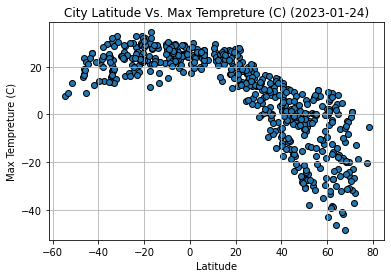

In [85]:
# Convert the date
date = time.strftime("(%Y-%m-%d)")

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Tempreture (C)")
plt.title(f"City Latitude Vs. Max Tempreture (C) {date}")

# Save the figure

plt.savefig("../Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

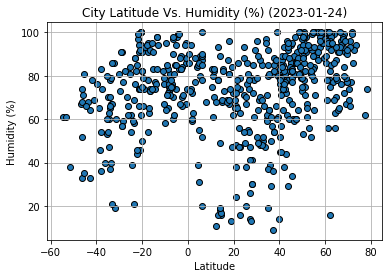

In [86]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude Vs. Humidity (%) {date}")

# Save the figure

plt.savefig("../Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

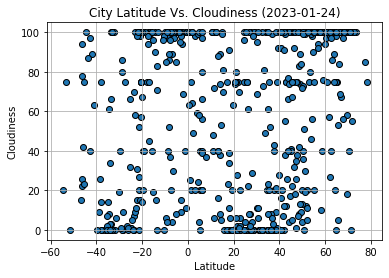

In [87]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude Vs. Cloudiness {date}")

# Save the figure

plt.savefig("../Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

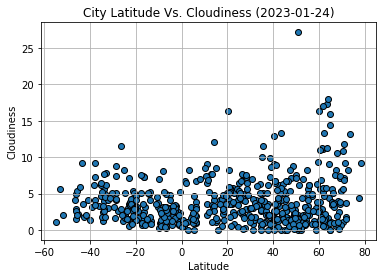

In [88]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude Vs. Cloudiness {date}")

# Save the figure

plt.savefig("../Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [102]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq= "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = round(st.pearsonr(x_values, y_values)[0],2)
    
    # plot the scatter chart with linear regression line, equation of line
    plt.scatter(x_values, y_values, color="aqua", edgecolor="b")
    plt.plot(x_values, regress_values, color= "red", label= "y={:.2f}x+{:.2f}".format(slope,intercept))
    plt.legend()
#     plt.annotate(line_eq, (0,0), fontsize = 15, color="red")
    plt.xlabel("Latitide")
    print (f" The r² is: {round(rvalue**2,2)}")
    print(f" The correlation is :{correlation}")
    plt.show()
    

In [103]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,verkhnetulomskiy,68.6073,31.7962,-2.93,91,100,2.44,RU,1674610518
3,kargasok,59.0556,80.8572,-29.68,98,76,2.68,RU,1674610519
5,asau,46.4333,26.4000,-2.49,86,92,1.57,RO,1674610520
6,kushiro,42.9750,144.3747,-11.47,79,75,1.54,JP,1674610521
7,kapaa,22.0752,-159.3190,26.99,86,75,3.60,US,1674610521


In [104]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pozo colorado,-23.4923,-58.7972,28.50,58,7,3.07,PY,1674610518
2,broken hill,-31.9500,141.4333,33.04,19,0,3.06,AU,1674610519
4,bluff,-46.6000,168.3333,15.61,67,15,4.10,NZ,1674610520
8,ushuaia,-54.8000,-68.3000,7.81,61,20,1.03,AR,1674610522
9,hobart,-42.8794,147.3294,25.92,64,40,3.60,AU,1674610259


###  Temperature vs. Latitude Linear Regression Plot

 The r² is: 0.63
 The correlation is :-0.79


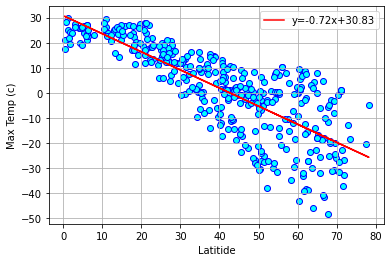

None


In [105]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]
plt.grid()

plt.ylabel("Max Temp (c)")
print(linear_reg_plot(x_values, y_values))

plt.show()

 The r² is: 0.18
 The correlation is :0.42


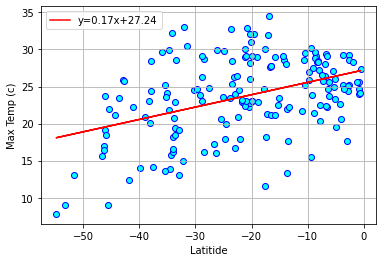

None


In [106]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]
plt.grid()
plt.ylabel("Max Temp (c)")
print(linear_reg_plot(x_values, y_values))

plt.show()

**Discussion about the linear relationship:** The above plots is a linear regression model between Maximum tempreture and latitude for Northern hemisphere and southern hemisphere, the result showed that :



**Northern hemisphere:** There is a strong negative correlation between the two variables, these mean when we go farther away from "Latitude 0" the Maximum tempreture will decrease.

**Southern hemisphere:** There is a weak positive correlation between the two variables.

### Humidity vs. Latitude Linear Regression Plot

 The r² is: 0.14
 The correlation is :0.37


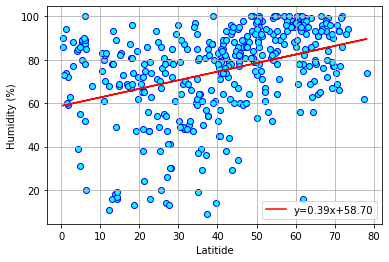

None


In [107]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Humidity"]
plt.grid()

plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values, y_values))

 The r² is: 0.21
 The correlation is :0.46


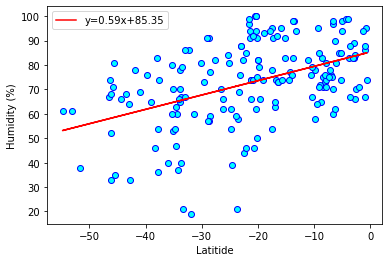

None


In [108]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Humidity"]

plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values, y_values))

plt.show()

**Discussion about the linear relationship:** The above plots is a linear regression model between Humidity(%) and latitude for Northern hemisphere and southern hemisphere, the result showed that :



**Northern hemisphere:** There is a posisitive weak correlation between the two variables.

**Southern hemisphere:** There is a posisitive weak correlation between the two variables.

### Cloudiness vs. Latitude Linear Regression Plot

 The r² is: 0.12
 The correlation is :0.34


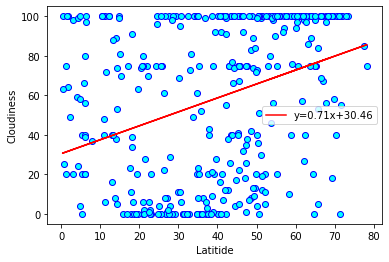

None


In [113]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]

plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values, y_values))

plt.show()

 The r² is: 0.17
 The correlation is :0.41


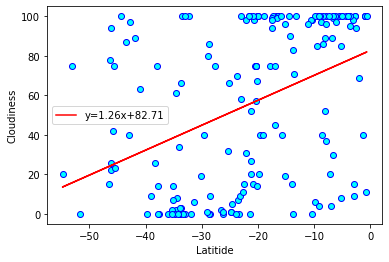

None


In [114]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Cloudiness"]

plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values, y_values))

plt.show()

**Discussion about the linear relationship:** The above plots is a linear regression model between Cloudiness and latitude for Northern hemisphere and southern hemisphere, the result showed that :



**Northern hemisphere:** There is a posisitive weak correlation between the two variables.

**Southern hemisphere:** There is a posisitive weak correlation between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

 The r² is: 0.02
 The correlation is :0.13


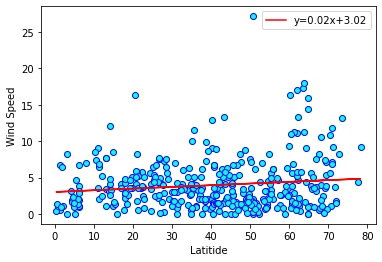

None


In [115]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Wind Speed"]

plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values, y_values))

plt.show()

 The r² is: 0.09
 The correlation is :-0.29


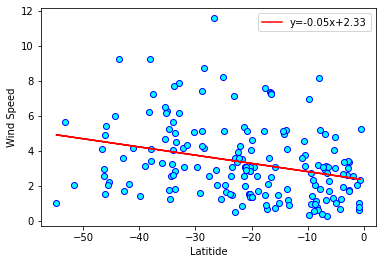

None


In [116]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Wind Speed"]

plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values, y_values))

plt.show()

**Discussion about the linear relationship:** The above plots is a linear regression model between Humidity(%) and latitude for Northern hemisphere and southern hemisphere, the result showed that :



**Northern hemisphere:** There is a posisitive very weak correlation between the two variables.

**Southern hemisphere:** There is a negative very weak correlation between the two variables.